In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load the main files
books = pd.read_csv("books.csv")
ratings = pd.read_csv("ratings.csv")
book_tags = pd.read_csv("book_tags.csv")
tags = pd.read_csv("tags.csv")
to_read = pd.read_csv("to_read.csv")

In [5]:
# Check the first few rows and basic info
print("Books Data:")
print(books.info(),"\n")

print("Ratings Data:")
print(ratings.info(),"\n")

print("Book Tags Data:")
print(book_tags.info(), "\n")

print("Tags Data:")
print(tags.info(), "\n")

print("To Read Data:")
print(to_read.info(),"\n")


Books Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 no

In [6]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [7]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [8]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [9]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [10]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [11]:
print("Missing values:\n")
print("Books:\n", books.isnull().sum(), "\n")
print("Ratings:\n", ratings.isnull().sum(), "\n")
print("Book Tags:\n", book_tags.isnull().sum(), "\n")
print("Tags:\n", tags.isnull().sum(), "\n")
print("To Read:\n", to_read.isnull().sum(), "\n")

Missing values:

Books:
 id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64 

Ratings:
 book_id    0
user_id    0
rating     0
dtype: int64 

Book Tags:
 goodreads_book_id    0
tag_id               0
count                0
dtype: int64 

Tags:
 tag_id     

In [12]:
# Normalize ratings using Min-Max Scaling (0 to 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ratings['normalized_rating'] = scaler.fit_transform(ratings[['rating']])

# Optional: show a few samples
ratings[['user_id', 'book_id', 'rating', 'normalized_rating']].head()

,user_id,book_id,rating,normalized_rating
0,314,1,5,1.00
1,439,1,3,0.50
2,588,1,5,1.00
3,1169,1,4,0.75
4,1185,1,4,0.75


In [13]:
# Check missing values
print(books.isnull().sum())
print(ratings.isnull().sum())
print(book_tags.isnull().sum())
print(tags.isnull().sum())
print(to_read.isnull().sum())

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64
book_id              0
user_id              0
rating               0
normalized_rating    0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
tag_id      0
tag_

In [14]:
books['isbn'] = books['isbn'].fillna('0000000000')
books['isbn13'] = books['isbn13'].fillna('0000000000000').astype(str)
books['original_title'] = books['original_title'].fillna(books['title'])
books['original_publication_year'] = books['original_publication_year'].fillna(books['original_publication_year'].median())
books['language_code'] = books['language_code'].fillna('unknown')

In [15]:
print("After Preprocessing:")
print(books.isnull().sum())
print(ratings.isnull().sum())
print(book_tags.isnull().sum())
print(tags.isnull().sum())
print(to_read.isnull().sum())

After Preprocessing:
id                           0
book_id                      0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64
book_id              0
user_id              0
rating               0
normalized_rating    0
dtype: int64
goodreads_book_id    0
tag_id               0
count                0
dtype: int64
tag_id      0
tag_name    0
dtype: int64
user_id    0
book_id    0

In [16]:
books.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)
book_tags.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
to_read.drop_duplicates(inplace=True)

In [17]:
ratings = ratings[ratings['book_id'].isin(books['book_id'])]
to_read = to_read[to_read['book_id'].isin(books['book_id'])]
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books['book_id'])]

In [18]:
print(books.columns)


Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')


In [19]:
# Merge book_tags with tags
tagged_books = pd.merge(book_tags, tags, on="tag_id", how="left")

In [20]:
tagged_books

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult
...,...,...,...,...
999901,33288638,21303,7,neighbors
999902,33288638,17271,7,kindleunlimited
999903,33288638,1126,7,5-star-reads
999904,33288638,11478,7,fave-author


In [26]:
# Merge book_tags with tags
book_tags_merged = pd.merge(book_tags, tags, on='tag_id', how='left')

# Optional: Merge with books for enriched data
book_tags_full = (
    book_tags
    .merge(tags, on='tag_id', how='left')
    .merge(books, left_on='goodreads_book_id', right_on='best_book_id', how='inner')
)

book_tags_full[['title', 'tag_name', 'count']].head()


,title,tag_name,count
0,Harry Potter and the Half-Blood Prince (Harry ...,to-read,167697
1,Harry Potter and the Half-Blood Prince (Harry ...,fantasy,37174
2,Harry Potter and the Half-Blood Prince (Harry ...,favorites,34173
3,Harry Potter and the Half-Blood Prince (Harry ...,currently-reading,12986
4,Harry Potter and the Half-Blood Prince (Harry ...,young-adult,12716


In [47]:
tags_per_book = (
    book_tags_full
    .groupby('book_id')['tag_name']
    .apply(lambda s: ' '.join(s.fillna('').astype(str)))
    .reset_index())
tags_per_book.head()

,book_id,tag_name
0,1,to-read fantasy favorites currently-reading yo...
1,2,to-read currently-reading fantasy favorites ch...
2,3,to-read favorites fantasy currently-reading yo...
3,5,favorites fantasy currently-reading young-adul...
4,6,fantasy young-adult fiction harry-potter owned...


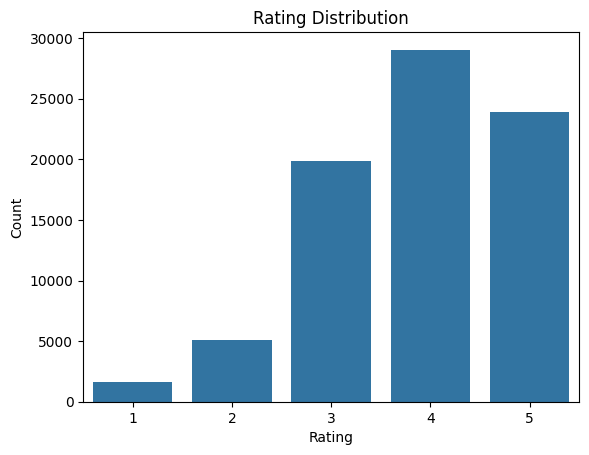

In [27]:
# Ratings distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\gowri\AppData\Local\Temp\ipykernel_11528\4234415688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='num_ratings', data=top_books_merged, palette='plasma')


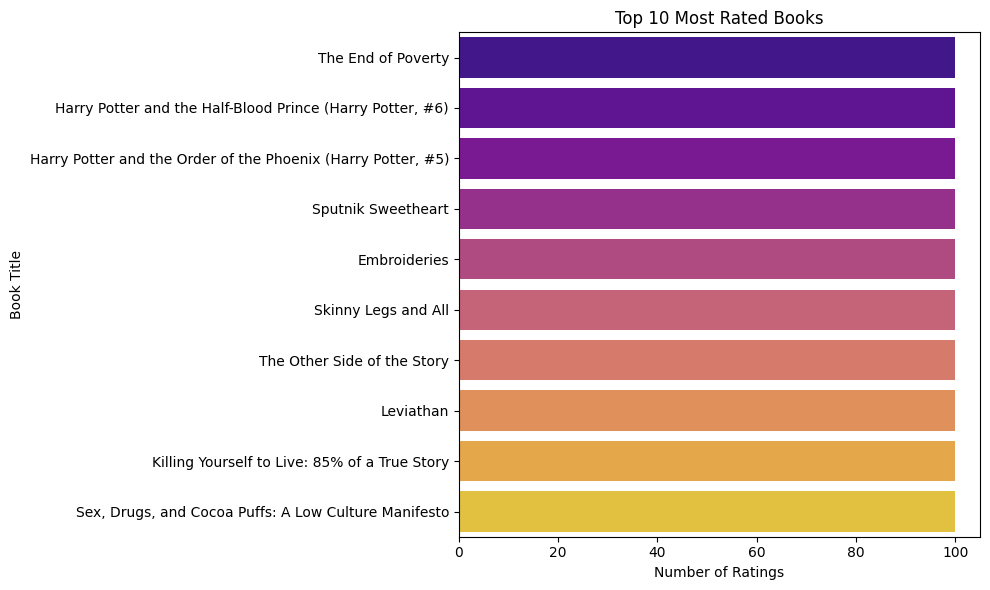

In [28]:
# Step 1: Get top 10 most rated book IDs from ratings
top_book_ids = ratings['book_id'].value_counts().head(10)
top_books_df = top_book_ids.reset_index()
top_books_df.columns = ['book_id', 'num_ratings']  # renamed to avoid column clash

# Step 2: Merge with books to get titles and authors
top_books_merged = top_books_df.merge(books, on='book_id')

# Step 3: Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='num_ratings', data=top_books_merged, palette='plasma')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


C:\Users\gowri\AppData\Local\Temp\ipykernel_11528\1856008545.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='average_rating', data=top_rated, palette='viridis')


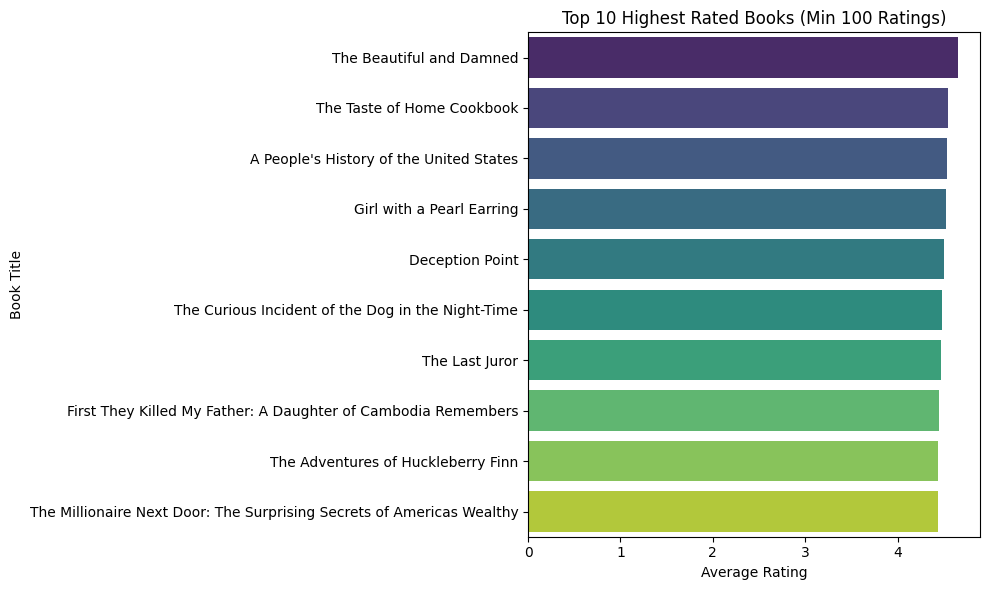

In [29]:
# Step 1: Calculate mean ratings and rating counts
mean_ratings = ratings.groupby('book_id')['rating'].mean()
ratings_count = ratings['book_id'].value_counts()

# Step 2: Filter only books with 100+ ratings
popular_books = mean_ratings[ratings_count >= 100].sort_values(ascending=False).head(10)

# Step 3: Get titles and authors (including book_id this time)
top_rated = books[books['book_id'].isin(popular_books.index)][['book_id', 'title', 'authors']]

# Step 4: Map the average ratings back
top_rated['average_rating'] = top_rated['book_id'].map(mean_ratings)

# Step 5: Sort and Plot
top_rated = top_rated.sort_values('average_rating', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='average_rating', data=top_rated, palette='viridis')

plt.title('Top 10 Highest Rated Books (Min 100 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

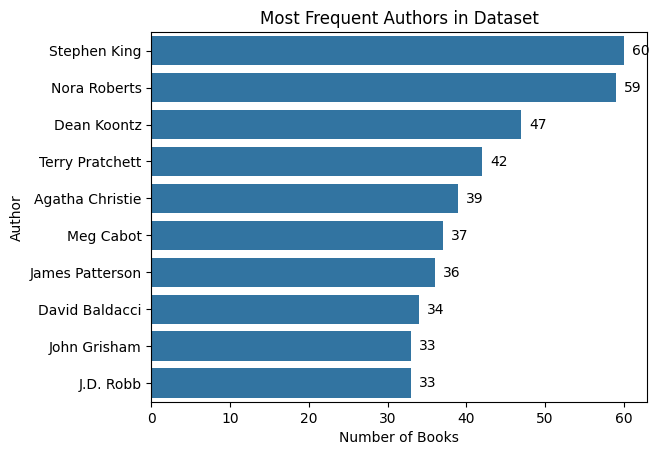

In [30]:
popular_authors = books['authors'].value_counts().head(10)
sns.barplot(y=popular_authors.index, x=popular_authors.values)
plt.title('Most Frequent Authors in Dataset')
plt.xlabel('Number of Books')
plt.ylabel('Author')
# Add value labels to bars
for i, value in enumerate(popular_authors.values):
    plt.text(value + 1, i, str(value), va='center')  # va = vertical alignment
plt.show()

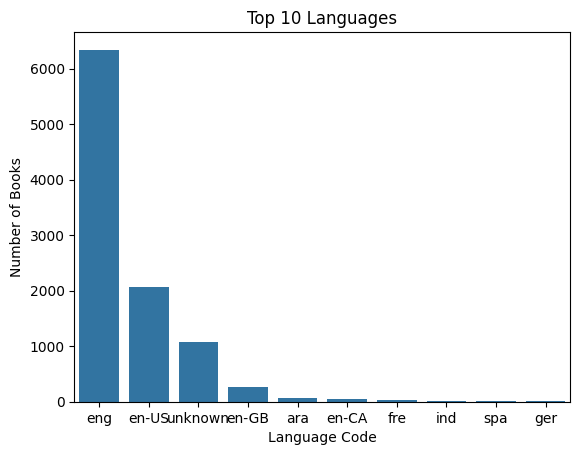

In [31]:
lang_counts = books['language_code'].value_counts().head(10)
sns.barplot(x=lang_counts.index, y=lang_counts.values)
plt.title('Top 10 Languages')
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.show()

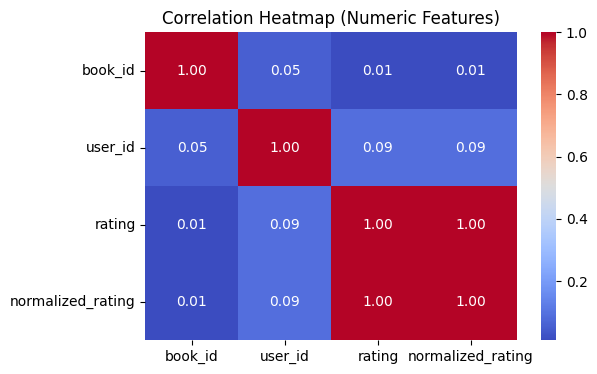

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# If you have a ratings DataFrame with numeric fields (e.g., rating, normalized_rating)
numeric_cols = ratings.select_dtypes(include=['float64', 'int64'])
corr = numeric_cols.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

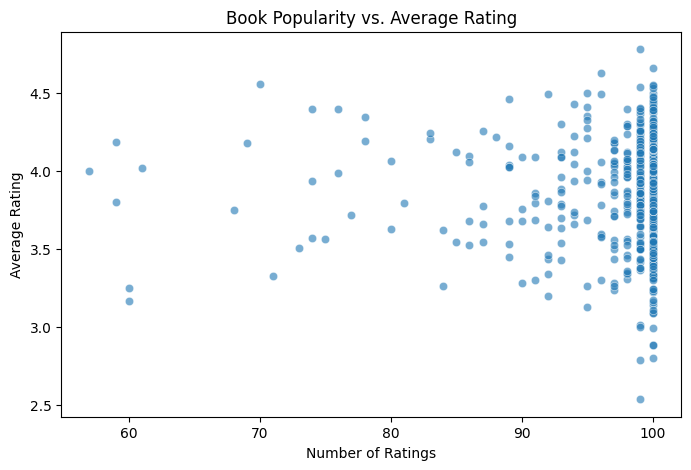

In [33]:
# Popularity = number of ratings per book
book_popularity = ratings.groupby('book_id').size().reset_index(name='rating_count')
book_avg_rating = ratings.groupby('book_id')['rating'].mean().reset_index(name='avg_rating')

popularity_df = book_popularity.merge(book_avg_rating, on='book_id')

plt.figure(figsize=(8,5))
sns.scatterplot(data=popularity_df, x='rating_count', y='avg_rating', alpha=0.6)
plt.title("Book Popularity vs. Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [34]:
# Basic statistical summaries for ratings
print("Overall Rating Stats:")
print(ratings['rating'].describe())

# Ratings per book
book_stats = ratings.groupby('book_id')['rating'].agg(['count', 'mean', 'median', 'std']).reset_index()
book_stats.rename(columns={'count': 'num_ratings', 'mean': 'avg_rating', 'std': 'std_dev'}, inplace=True)

print("\nSample Book Rating Stats:")
print(book_stats.head())

# Ratings per user
user_stats = ratings.groupby('user_id')['rating'].agg(['count', 'mean', 'median', 'std']).reset_index()
user_stats.rename(columns={'count': 'num_ratings', 'mean': 'avg_rating', 'std': 'std_dev'}, inplace=True)

print("\nSample User Rating Stats:")
print(user_stats.head())

Overall Rating Stats:
count    79583.000000
mean         3.861151
std          0.985824
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Sample Book Rating Stats:
   book_id  num_ratings  avg_rating  median   std_dev
0        1          100        4.24     4.0  0.888990
1        2          100        4.21     4.5  1.037625
2        3          100        3.09     3.0  1.470896
3        5          100        3.89     4.0  1.072098
4        6          100        4.09     4.0  1.045384

Sample User Rating Stats:
   user_id  num_ratings  avg_rating  median   std_dev
0        2            1         4.0     4.0       NaN
1        3            1         1.0     1.0       NaN
2        4            1         2.0     2.0       NaN
3        7            4         4.0     4.0  1.154701
4        9            1         4.0     4.0       NaN


In [35]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9780439023480.0,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9780439554930.0,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9780316015840.0,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9780061120080.0,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9780743273560.0,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [36]:
ratings.head()

,book_id,user_id,rating,normalized_rating
0,1,314,5,1.00
1,1,439,3,0.50
2,1,588,5,1.00
3,1,1169,4,0.75
4,1,1185,4,0.75


In [37]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [38]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [39]:
to_read.head()

,user_id,book_id
0,1,112
8,2,11
9,2,13
12,2,106
23,2,1371


In [40]:
book_tags_full.head(50)

,goodreads_book_id,tag_id,count,tag_name,id,book_id,best_book_id,work_id,books_count,isbn,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,30574,167697,to-read,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,1,11305,37174,fantasy,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
2,1,11557,34173,favorites,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
3,1,8717,12986,currently-reading,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
4,1,33114,12716,young-adult,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
5,1,11743,9954,fiction,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
6,1,14017,7169,harry-potter,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
7,1,5207,6221,books-i-own,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
8,1,22743,4974,owned,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
9,1,32989,4364,ya,27,1,1,41335427,275,439785960,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...


In [49]:
# Save the cleaned and processed dataframes to new CSV files
books.to_csv('cleaned_books.csv', index=False)
ratings.to_csv('cleaned_ratings.csv', index=False)
book_tags_full.to_csv('cleaned_book_tags.csv', index=False)
to_read.to_csv('cleaned_to_read.csv', index=False)
tagged_books.to_csv('tagged_books.csv', index=False)


In [18]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Load cleaned ratings
ratings = pd.read_csv("cleaned_ratings.csv")

# Reader (rating scale from 1–5)
reader = Reader(rating_scale=(1, 5))

# Use full dataset (but you can sample for user-based CF to avoid memory issues)
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

In [20]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Load cleaned ratings
ratings = pd.read_csv("cleaned_ratings.csv")

# Reader with rating scale
reader = Reader(rating_scale=(1, 5))

# ---------------------------
# ITEM-BASED COLLABORATIVE FILTERING
# ---------------------------
print("\n🔹 Item-Based CF (Full Dataset)")
data_item = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)
trainset_item, testset_item = train_test_split(data_item, test_size=0.2)

sim_options_item = {'name': 'cosine', 'user_based': False}   # Item-based
item_cf = KNNBasic(sim_options=sim_options_item, verbose=True)
item_cf.fit(trainset_item)
predictions_item = item_cf.test(testset_item)

print("Item-Based CF Results:")
accuracy.rmse(predictions_item)
accuracy.mae(predictions_item)


# ---------------------------
# USER-BASED COLLABORATIVE FILTERING (on sample to avoid memory error)
# ---------------------------
print("\n🔹 User-Based CF (Sampled Dataset)")

# Take 10% of ratings for user-based (to reduce matrix size)
sampled_ratings = ratings.sample(frac=0.1, random_state=42)
data_user = Dataset.load_from_df(sampled_ratings[['user_id', 'book_id', 'rating']], reader)
trainset_user, testset_user = train_test_split(data_user, test_size=0.2)

sim_options_user = {'name': 'cosine', 'user_based': True}    # User-based
user_cf = KNNBasic(sim_options=sim_options_user, verbose=True)
user_cf.fit(trainset_user)
predictions_user = user_cf.test(testset_user)

print("User-Based CF Results (on sample):")
accuracy.rmse(predictions_user)
accuracy.mae(predictions_user)



🔹 Item-Based CF (Full Dataset)
Computing the cosine similarity matrix...
Done computing similarity matrix.
Item-Based CF Results:
RMSE: 1.0120
MAE:  0.7559

🔹 User-Based CF (Sampled Dataset)
Computing the cosine similarity matrix...
Done computing similarity matrix.
User-Based CF Results (on sample):
RMSE: 0.9882
MAE:  0.7797


0.7797463006202864

In [10]:
from surprise import SVD, NMF

# SVD
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
print("SVD")
accuracy.rmse(predictions_svd)
accuracy.mae(predictions_svd)

# NMF
nmf = NMF()
nmf.fit(trainset)
predictions_nmf = nmf.test(testset)
print("NMF")
accuracy.rmse(predictions_nmf)
accuracy.mae(predictions_nmf)

SVD
RMSE: 0.9135
MAE:  0.7305
NMF
RMSE: 1.0463
MAE:  0.8243


0.8242703015459305

In [21]:
from collections import defaultdict

# Function to get Top-N predictions
def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Precision, Recall, F1 at K
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions, recalls, f1s = [], [], []

    for uid, user_ratings in user_est_true.items():
        # Sort by estimated rating
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)     # all relevant
        n_rel_and_rec = sum((true_r >= threshold) for (_, true_r) in top_k)    # relevant in top-k

        prec = n_rel_and_rec / k if k else 0
        rec = n_rel_and_rec / n_rel if n_rel else 0
        f1 = (2 * prec * rec / (prec + rec)) if (prec + rec) > 0 else 0

        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)

    return (sum(precisions) / len(precisions),
            sum(recalls) / len(recalls),
            sum(f1s) / len(f1s))

# Evaluate all models
for name, preds in [
    ("User CF", predictions_user),
    ("Item CF", predictions_item),
    ("SVD", predictions_svd),
    ("NMF", predictions_nmf)
]:
    p, r, f1 = precision_recall_at_k(preds, k=10, threshold=3.5)
    print(f"{name} -> Precision@10: {p:.4f}, Recall@10: {r:.4f}, F1@10: {f1:.4f}")


User CF -> Precision@10: 0.0701, Recall@10: 0.6772, F1@10: 0.1267
Item CF -> Precision@10: 0.0937, Recall@10: 0.7116, F1@10: 0.1612
SVD -> Precision@10: 0.0936, Recall@10: 0.7179, F1@10: 0.1611
NMF -> Precision@10: 0.0936, Recall@10: 0.7179, F1@10: 0.1611
